[Explanation Video](https://drive.google.com/file/d/1gDDcEnN_iYZRyjTMuEXRueSu5e8l_xgu/view?usp=sharing)

### Importing required libraries

In [1]:
import numpy as np
import pandas as pd
import time
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler,StandardScaler
!pip install mplfinance
import mplfinance as mpf

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.0/75.0 kB 1.5 MB/s eta 0:00:00


In [2]:
#connecting to the google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


### Importing data from the Google drive

In [3]:
data = pd.read_csv("/content/drive/MyDrive/EE782_data/A_1min.csv")
data

,Date Time,Open,High,Low,Close,Volume
0,2005-01-03 09:30:00,14.8242,14.8242,14.8181,14.8242,173492
1,2005-01-03 09:31:00,14.8242,14.8242,14.8119,14.8119,9646
2,2005-01-03 09:32:00,14.8119,14.8242,14.8119,14.8181,34810
3,2005-01-03 09:33:00,14.8181,14.8242,14.8181,14.8242,11464
4,2005-01-03 09:34:00,14.8242,14.8242,14.8181,14.8181,12302
...,...,...,...,...,...,...
1680045,2022-02-25 16:02:00,133.7300,133.7300,133.7300,133.7300,354729
1680046,2022-02-25 16:03:00,133.7300,133.7300,133.7300,133.7300,6777
1680047,2022-02-25 16:10:00,133.7300,133.7300,133.7300,133.7300,0
1680048,2022-02-25 18:30:00,133.7300,133.7300,133.7300,133.7300,0


In [4]:
print(data.columns) #columns in a dataset

Index(['Date Time', 'Open', 'High', 'Low', 'Close', 'Volume'], dtype='object')


In [5]:
# import matplotlib.dates as mdates

## Minute-by-Minute Closing Price Series for all data

In [6]:
# data['Date Time'] = pd.to_datetime(data['Date Time'], format='%Y-%m-%d %H:%M:%S')

# # Create a plot of the minute-by-minute closing price series
# plt.figure(figsize=(12, 6))
# plt.plot(data['Date Time'], data['Close'], label='Closing Price', linewidth=1)
# plt.title('Minute-by-Minute Closing Price Series')
# plt.xlabel('Time')
# plt.ylabel('Closing Price')
# plt.grid(True)
# plt.legend()
# plt.show()

## Minute-by-Minute Closing Price Series for the years 2007-2008

In [7]:
# # Define the time range you want to filter
# start_date = '2007-01-01'
# end_date = '2008-12-31'

# # Filter the data based on the specified date range
# filtered_data = data[(data['Date Time'] >= start_date) & (data['Date Time'] <= end_date)]

# # Create a plot of the minute-by-minute closing price series for the filtered data
# plt.figure(figsize=(12, 6))
# plt.plot(filtered_data['Date Time'], filtered_data['Close'], label='Closing Price', linewidth=1)
# plt.title('Minute-by-Minute Closing Price Series (2007-2008)')
# plt.xlabel('Time')
# plt.ylabel('Closing Price')
# plt.grid(True)
# plt.legend()
# plt.show()

## Function to plot Minute-by-Minute Closing Price for any year or a duration


In [8]:
# def plot_minute_by_minute_closing_prices(data, start_year, end_year):
#   # Define the start and end dates based on the input years
#   start_date = f'{start_year}-01-01'
#   end_date = f'{end_year}-12-31'
#   # Filter the data based on the specified date range
#   filtered_data = data[(data['Date Time'] >= start_date) & (data['Date Time'] <= end_date)]
#   # Create a plot of the minute-by-minute closing price series for the filtered data
#   fig, ax = plt.subplots(figsize=(12, 6))
#   ax.plot(filtered_data['Date Time'], filtered_data['Close'], label='Closing Price', linewidth=1)

#   # Format the x-axis to show abbreviated month names
#   ax.xaxis.set_major_locator(mdates.MonthLocator())
#   ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))

#   plt.title(f'Minute-by-Minute Closing Price Series ({start_year}-{end_year})')
#   plt.xlabel('Time')
#   plt.ylabel('Closing Price')
#   plt.grid(True)
#   plt.legend()
#   plt.show()

# # Call the function with the desired start and end years
# plot_minute_by_minute_closing_prices(data, start_year=2009, end_year=2009)


In [9]:
# def plot_day_by_day_closing_prices(data, start_year, end_year):
#   # Define the start and end dates based on the input years
#   start_date = f'{start_year}-01-01'
#   end_date = f'{end_year}-12-31'
#   # Filter the data based on the specified date range
#   filtered_data = data[(data['Date Time'] >= start_date) & (data['Date Time'] <= end_date)]
#   # Create a daily resampled DataFrame for closing prices
#   daily_data = filtered_data.resample('D', on='Date Time').last()  # Resample to daily frequency
#   # Create a plot of the day-by-day closing price series for the filtered data
#   fig, ax = plt.subplots(figsize=(12, 6))
#   ax.plot(daily_data.index, daily_data['Close'], label='Closing Price', linewidth=1)

#   # Format the x-axis to show months and years
#   ax.xaxis.set_major_locator(mdates.MonthLocator())
#   ax.xaxis.set_major_formatter(mdates.DateFormatter('%b'))
#   x_ticks = daily_data.index[11::21]
#   ax.set_xticks(x_ticks)


#   plt.title(f'Day-by-Day Closing Price Series ({start_year}-{end_year})')
#   plt.xlabel('Time')
#   plt.ylabel('Closing Price')
#   plt.xticks(rotation=45)
#   plt.grid(True)
#   plt.legend()
#   plt.show()

# # Call the function with the desired start and end years
# plot_day_by_day_closing_prices(data, start_year=2007, end_year=2007)


I got wrong plot because I forgot to consider the stock market closing time which led to missing data points

## Function to plot Day-by-Day Closing Price for any year or a duration

In [10]:
# def plot_day_by_day_closing_prices(data, start_year, end_year):
#   # Filter the data for the specified date range and closing time
#   filtered_data = data[(data['Date Time'].dt.year >= start_year) & (data['Date Time'].dt.year <= end_year) & (data['Date Time'].dt.time == pd.to_datetime('15:59:00').time())]  # Assuming close time is 15:59:00

#   # Extract time and closing price data
#   time = filtered_data['Date Time']
#   closing_price = filtered_data['Close']

#   plt.figure(figsize=(12, 6))
#   plt.plot(time, closing_price)
#   plt.title(f'Closing Prices vs. Time for {start_year} to {end_year}')
#   plt.xlabel('Time')
#   plt.ylabel('Close Price')

#   # Set x-axis ticks to display a new month approximately every 21 days
#   x_ticks = time.iloc[11::21]  # Assuming that every 21st data point corresponds to a new month
#   plt.xticks(x_ticks, x_ticks.dt.strftime('%b'))

#   plt.show()

# # Call the function with the desired start and end years
# plot_day_by_day_closing_prices(data, start_year=2007, end_year=2007)


### Filtering Stock Market Data for Trading Hours

In [11]:
# Converting Date Time Column to DateTime Format
data['Date Time'] = pd.to_datetime(data['Date Time'], format='%Y-%m-%d %H:%M:%S')

In [12]:
# Define the start and close times for the stock market
start_time = pd.to_datetime('09:30:00').time()   # Starting time of the stock market
close_time = pd.to_datetime('15:59:00').time()  # A minute before the closing time
end_time = pd.to_datetime('16:00:00').time()     # Closing time

# Filter the stock market data for the specified trading hours
crt_data = data[(data['Date Time'].dt.time >= start_time) & (data['Date Time'].dt.time <= end_time)]
crt_data

,Date Time,Open,High,Low,Close,Volume
0,2005-01-03 09:30:00,14.8242,14.8242,14.8181,14.8242,173492
1,2005-01-03 09:31:00,14.8242,14.8242,14.8119,14.8119,9646
2,2005-01-03 09:32:00,14.8119,14.8242,14.8119,14.8181,34810
3,2005-01-03 09:33:00,14.8181,14.8242,14.8181,14.8242,11464
4,2005-01-03 09:34:00,14.8242,14.8242,14.8181,14.8181,12302
...,...,...,...,...,...,...
1680040,2022-02-25 15:55:00,133.3100,133.4300,133.2300,133.3400,16474
1680041,2022-02-25 15:56:00,133.3300,133.4400,133.3100,133.4200,24689
1680042,2022-02-25 15:57:00,133.4300,133.4300,133.3100,133.3500,27091
1680043,2022-02-25 15:58:00,133.3500,133.4000,133.2800,133.3200,28021


### Visualization of Minute-by-Minute Closing Price Series

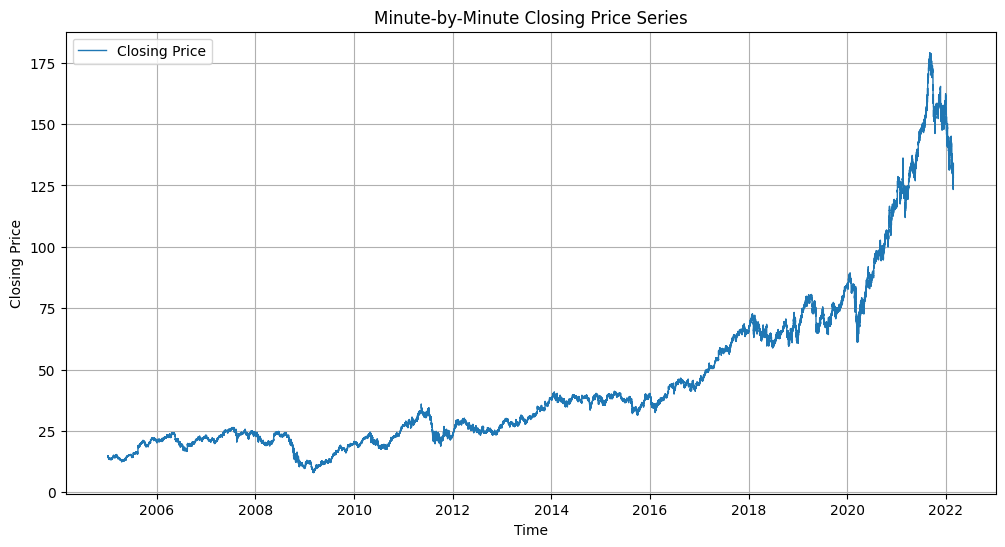

In [13]:
# Title: Visualization of Minute-by-Minute Closing Price Series

# Extract the relevant columns from crt_data
time = crt_data['Date Time']  # Extract the timestamp data
closing_price = crt_data['Close']  # Extract the closing price data

# Create a plot of the minute-by-minute closing price series
plt.figure(figsize=(12, 6))  # Create a new figure with specified size
plt.plot(time, closing_price, label='Closing Price', linewidth=1)  # Plot the closing price over time
plt.title('Minute-by-Minute Closing Price Series')  # Set the plot title
plt.xlabel('Time')  # Label the x-axis as 'Time'
plt.ylabel('Closing Price')  # Label the y-axis as 'Closing Price'
plt.grid(True)  # Add a grid to the plot
plt.legend()  # Display the legend
plt.show()  # Show the plot

### Visualizing Minute-by-Minute Closing Price Series for a Specified Date Range

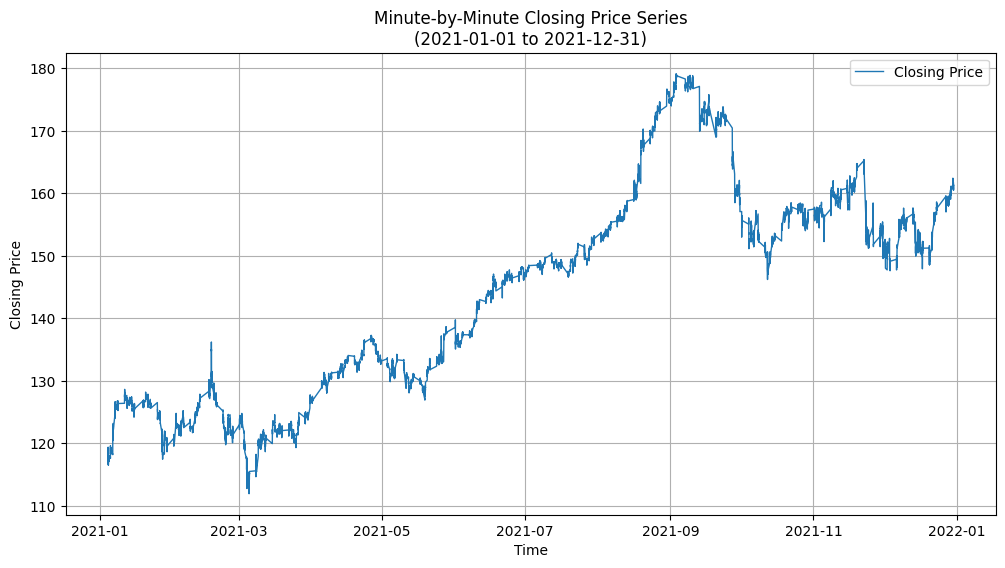

In [14]:
# Define start_date and end_date for the date range of interest
start_date = '2021-01-01'
end_date = '2021-12-31'

# Filter the 'crt_data' DataFrame based on the specified date range
filtered_data = crt_data[(crt_data['Date Time'] >= start_date) & (crt_data['Date Time'] <= end_date)]

# Extract the relevant columns from the filtered data
time = filtered_data['Date Time']         # Extract the timestamp
closing_price = filtered_data['Close']    # Extract the closing price

# Create a plot of the minute-by-minute closing price series
plt.figure(figsize=(12, 6))
plt.plot(time, closing_price, label='Closing Price', linewidth=1)
plt.title(f'Minute-by-Minute Closing Price Series\n({start_date} to {end_date})')  # Set the plot title
plt.xlabel('Time')                         # Label for the x-axis
plt.ylabel('Closing Price')                # Label for the y-axis
plt.grid(True)                             # Display gridlines
plt.legend()                               # Display legend
plt.show()                                 # Show the plot

### Plot Minute-by-Minute Closing Prices for a Specified Year Range

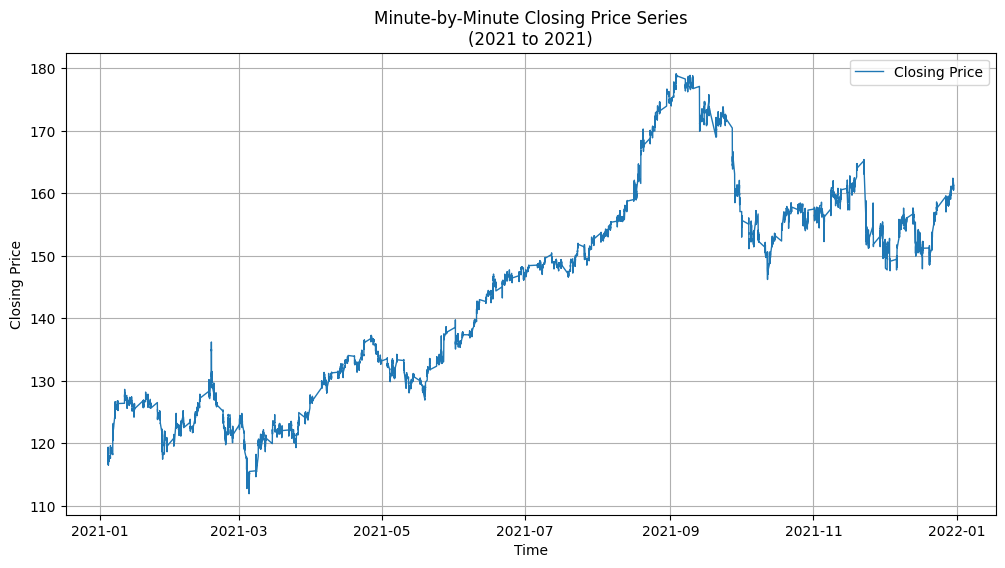

In [15]:
# Function to plot minute-by-minute closing prices for a specified year range
def plot_minute_by_minute_closing_prices(start_year, end_year, data):
    # Define start_date and end_date based on the input years
    start_date = f'{start_year}-01-01'
    end_date = f'{end_year}-12-31'
    # Filter data based on the specified date range
    filtered_data = data[(data['Date Time'] >= start_date) & (data['Date Time'] <= end_date)]
    # Extract the relevant columns from filtered_data
    time = filtered_data['Date Time']
    closing_price = filtered_data['Close']
    # Create a plot of the minute-by-minute closing price series
    plt.figure(figsize=(12, 6))
    plt.plot(time, closing_price, label='Closing Price', linewidth=1)
    plt.title(f'Minute-by-Minute Closing Price Series\n({start_year} to {end_year})')
    plt.xlabel('Time')
    plt.ylabel('Closing Price')
    plt.grid(True)
    plt.legend()
    plt.show()

# Call the function with the desired start_year, end_year, and data
plot_minute_by_minute_closing_prices(start_year=2021, end_year=2021, data=crt_data)

### Plot Day-by-Day Closing Prices for a Specified Year Range

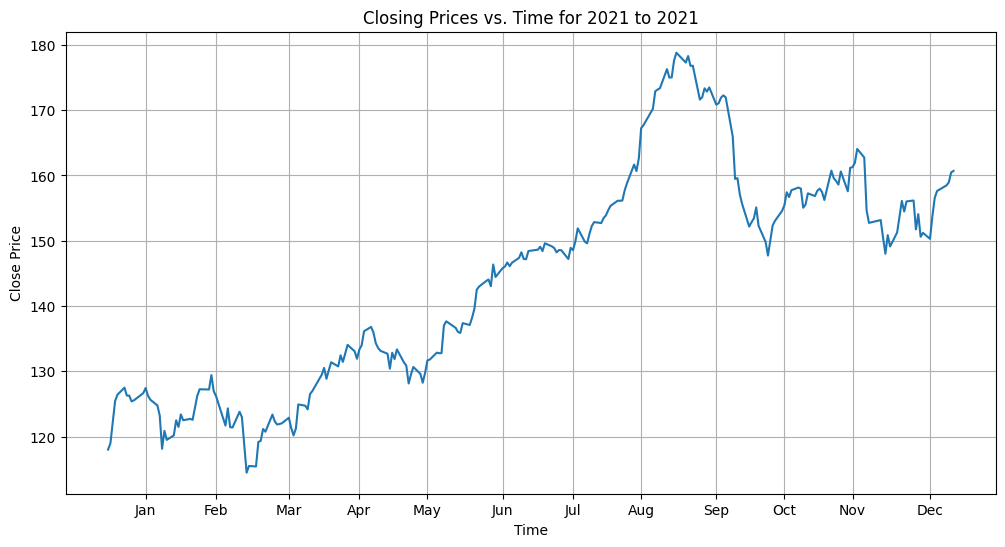

In [16]:
def plot_day_by_day_closing_prices(start_year, end_year, data):
  # Define start_date and end_date based on the input years
  start_date = f'{start_year}-01-01'
  end_date = f'{end_year}-12-31'
  # Filter data based on the specified date range and closing time
  filtered_data = data[(data['Date Time'] >= start_date) & (data['Date Time'] <= end_date) & (data['Date Time'].dt.time == pd.to_datetime('15:59:00').time())]
  # Extract time and closing price data
  time = filtered_data['Date Time']
  closing_price = filtered_data['Close']
  # Create a plot of day-by-day closing price series
  plt.figure(figsize=(12, 6))
  plt.plot(time, closing_price)
  plt.title(f'Closing Prices vs. Time for {start_year} to {end_year}')
  plt.xlabel('Time')
  plt.ylabel('Close Price')
  # Set x-axis ticks to display a new month approximately every 21 days
  x_ticks = time.iloc[11::21]  # Assuming that every 21st data point corresponds to a new month
  plt.xticks(x_ticks, x_ticks.dt.strftime('%b'))
  plt.grid(True)
  plt.show()

# Call the function with the desired start_year, end_year, and data
plot_day_by_day_closing_prices(start_year=2021, end_year=2021, data=crt_data)

In [17]:
crt_data.set_index('Date Time', inplace=True)
# Set the 'Date Time' column as the index for the DataFrame 'crt_data'.
# This operation replaces the default integer index with the 'Date Time' values,
# making it easier to access and work with time-series data.

### Candlestick Chart with Volume for a Specific Time Range

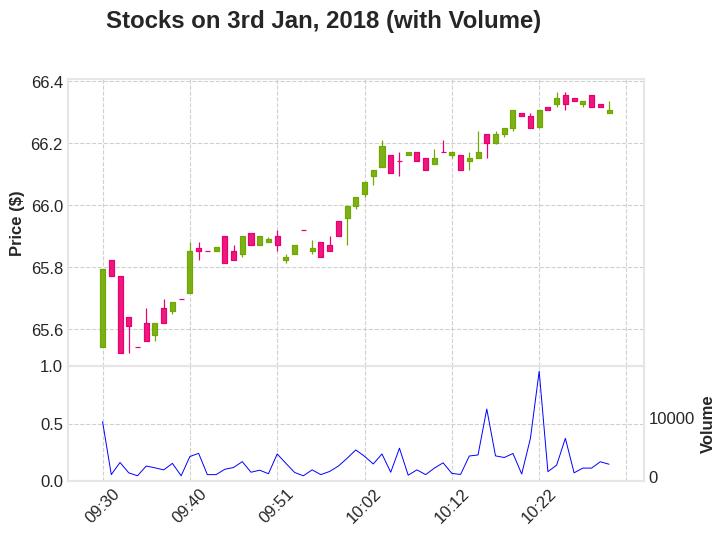

In [18]:
# Define the start and end times for the plot as datetime objects
start = pd.to_datetime('2018-01-03 09:30:00')
end = pd.to_datetime('2018-01-03 10:30:00')

# Extract data for the specified time range
subset_data = crt_data[(crt_data.index >= start) & (crt_data.index <= end)]

# Create a subplot for volume on the secondary y-axis
volume = mpf.make_addplot(subset_data["Volume"], panel=1, color="blue", width=0.7, ylabel="Volume", secondary_y=True)

# Create the candlestick chart with volume on the secondary y-axis
mpf.plot(subset_data, type='candle', addplot=[volume], style='binance', title="Stocks on 3rd Jan, 2018 (with Volume)", ylabel="Price ($)")

### Observations:
**Volume Fluctuations**: We observe that at the beginning and end of the trading day, there is a significant surge in the trading volume, indicating a higher level of shares being bought and sold during those periods.

### Normalization Techniques:

* **MinMaxScaler**: One normalization technique applied to the data involves scaling it using the Min-Max scaling method. This method transforms the data so that it falls within a specified range, typically between 0 and 1, preserving the relationships between values while ensuring they are all within a consistent scale.

* **Z-Scaler**: Another normalization method is the z-scaler, which transforms the data to have a mean (average) of 0 and a standard deviation of 1. This technique is useful for standardizing data and making it easier to compare and analyze, particularly when dealing with features or variables that have different units or scales.

### Min-Max Scaling for Data Normalization

In [19]:
# Function to perform Min-Max scaling on the given dataset
def minmax_scaling(data):
    min_max_scaler = MinMaxScaler()  # Create a MinMaxScaler object for data normalization
    data_scaled = min_max_scaler.fit_transform(data)  # Normalize the data, excluding the datetime index
    data_minmax = pd.DataFrame(data_scaled, columns=data.columns)  # Convert the normalized data to a DataFrame
    data_minmax.insert(0, 'Date Time', data.index.values)  # Insert the DateTime column at the beginning for easy reference
    return data_minmax

# Call the minmax_scaling function on 'crt_data'
normalized_data = minmax_scaling(crt_data)

,Date Time,Open,High,Low,Close,Volume
0,2005-01-03 09:30:00,0.039682,0.039640,0.040719,0.040227,0.073304
1,2005-01-03 09:31:00,0.039682,0.039640,0.040683,0.040155,0.004075
2,2005-01-03 09:32:00,0.039610,0.039640,0.040683,0.040191,0.014708
3,2005-01-03 09:33:00,0.039646,0.039640,0.040719,0.040227,0.004843
4,2005-01-03 09:34:00,0.039682,0.039640,0.040719,0.040191,0.005197
...,...,...,...,...,...,...
1659356,2022-02-25 15:55:00,0.732361,0.732967,0.732382,0.732604,0.006960
1659357,2022-02-25 15:56:00,0.732478,0.733025,0.732849,0.733071,0.010431
1659358,2022-02-25 15:57:00,0.733063,0.732967,0.732849,0.732662,0.011446
1659359,2022-02-25 15:58:00,0.732595,0.732791,0.732674,0.732487,0.011839


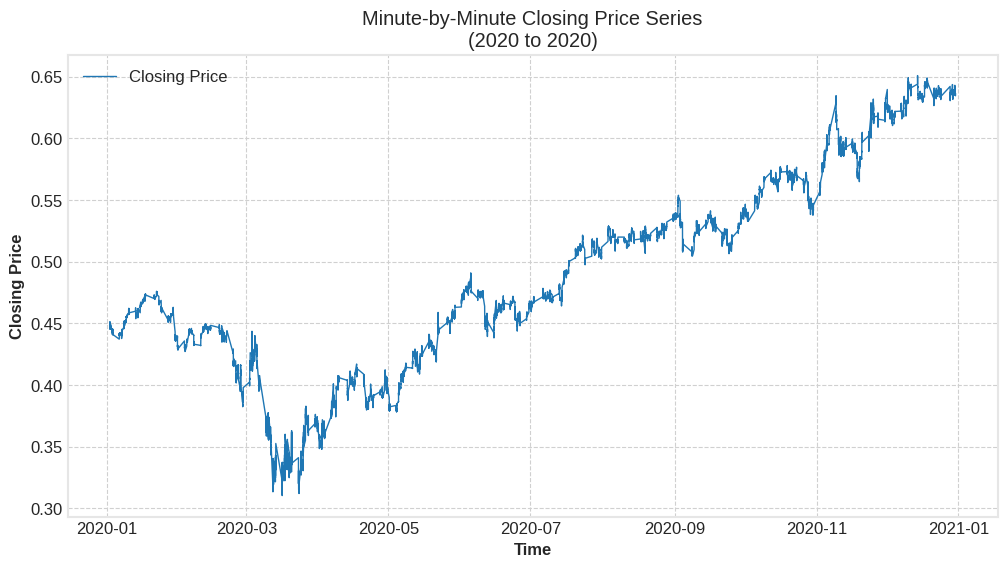

In [20]:
# applying the min-max scaling and plotting the normalized values
plot_minute_by_minute_closing_prices(2020,2020,minmax_scaling(crt_data))

### Z-Scale the Data with Date Time Column Insertion

In [21]:
# Define a function for Z-scaling the data
def zscaling(data):
    z_score_scaler = StandardScaler()   # Create a Z-score scaler object
    data_scaled = z_score_scaler.fit_transform(data)    # Use the Z-score scaler to normalize the data
    data_zscore = pd.DataFrame(data_scaled, columns=data.columns)   # Create a DataFrame with column names from the original data
    data_zscore.insert(0, 'Date Time', data.index.values)   # Insert the 'Date Time' column at the beginning for easier plotting
    return data_zscore    # Return the Z-scaled data with the inserted 'Date Time' column

# Call the zscaling function with the input data (crt_data)
zscaling(crt_data)

,Date Time,Open,High,Low,Close,Volume
0,2005-01-03 09:30:00,-0.870390,-0.870583,-0.870378,-0.870394,9.760535
1,2005-01-03 09:31:00,-0.870390,-0.870583,-0.870559,-0.870752,0.101594
2,2005-01-03 09:32:00,-0.870748,-0.870583,-0.870559,-0.870572,1.585045
3,2005-01-03 09:33:00,-0.870567,-0.870583,-0.870378,-0.870394,0.208768
4,2005-01-03 09:34:00,-0.870390,-0.870583,-0.870378,-0.870572,0.258169
...,...,...,...,...,...,...
1659356,2022-02-25 15:55:00,2.578219,2.580557,2.577079,2.579126,0.504114
1659357,2022-02-25 15:56:00,2.578801,2.580848,2.579408,2.581454,0.988399
1659358,2022-02-25 15:57:00,2.581711,2.580557,2.579408,2.579417,1.130000
1659359,2022-02-25 15:58:00,2.579383,2.579684,2.578535,2.578543,1.184825


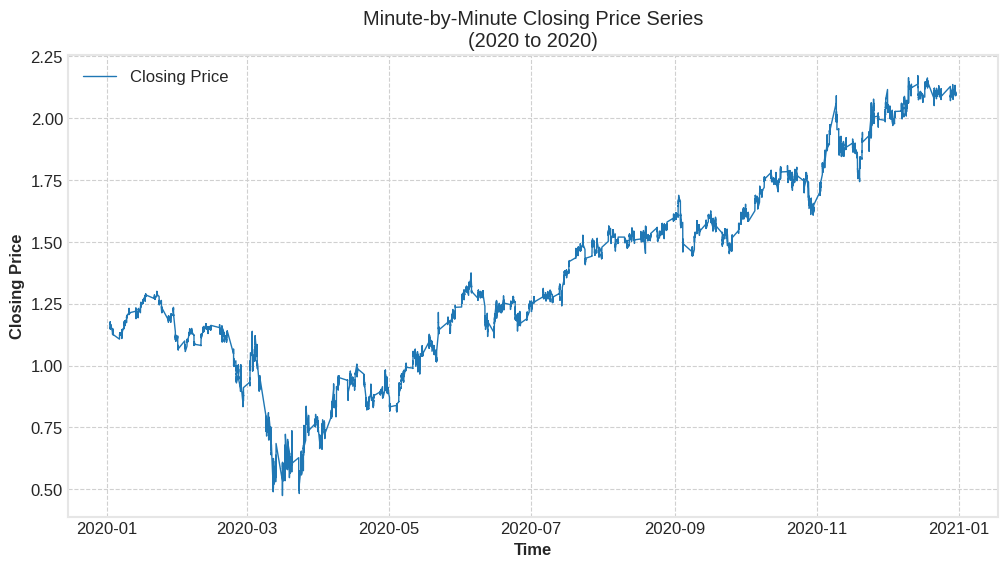

In [22]:
# applying the z-scaling and plotting the normalized values
plot_minute_by_minute_closing_prices(2020,2020,zscaling(crt_data))

### Observations:
* Min-Max scaling is preferred over the z-score normalization because it ensures that the normalized values always range between 0 and 1.
* In contrast, the z-score normalization can result in values below zero, which may pose challenges when calculating profits or losses based on percentages, as negative values could lead to calculation issues.

## Creating a Custom LSTM Model with Specified Input Dimensions, Units, and Layers

In [23]:
import torch
import torch.nn as nn

LSTM Neural Network Module

In [24]:
# Define a custom LSTM module using PyTorch's nn.Module
class LSTM(nn.Module):
    def __init__(self, input_size, hidden_size, output_size, num_layers):
        super(LSTM, self).__init__()

        # Define the LSTM layer with input size, hidden size, and number of layers
        self.lstm = nn.LSTM(input_size, hidden_size, num_layers, batch_first=True)

        # Define the fully connected (linear) layer connecting LSTM hidden to output
        self.fc = nn.Linear(hidden_size, output_size)

    def forward(self, x):
        # Forward pass through the LSTM
        out, _ = self.lstm(x)

        # Extract the output of the last time step
        out = self.fc(out[:, -1, :])
        return out

Resampling the data to decrease the frequency to make the pytorch module flexible for the dataloader

In [25]:
def resample_data(data, frequency='1d'):
    """
    Resample the data to a lower frequency.

    Parameters:
    - data: The input data to be resampled.
    - frequency: The desired frequency for resampling (e.g., '1d' for daily, '1H' for hourly).

    Returns:
    - Resampled data with aggregated values.
    """
    aggregation_rules = {
        "Open": "first",
        "High": "max",
        "Low": "min",
        "Close": "last",
        "Volume": "sum"
    }

    # Perform resampling with the specified frequency
    resampled_data = data.resample('{}'.format(frequency), origin='start').agg(aggregation_rules).dropna()
    return resampled_data


We need to set up data loaders for training and testing the LSTM model. In this process, we define the sequence length as the input size for the model, and the following upcoming value serves as the model's output. This arrangement allows us to train and evaluate the model effectively.

In [26]:
from torch.utils.data import Dataset, DataLoader

class StockDataset(Dataset):
    """
    Custom dataset for stock market data.

    Parameters:
    - data: The stock market data.
    - sequence_length: The length of input sequences.
    """

    def __init__(self, data, sequence_length):
        self.data = data
        self.sequence_length = sequence_length

    def __len__(self):
        return len(self.data) - self.sequence_length

    def __getitem__(self, idx):
        idx += self.sequence_length
        features = self.data.iloc[idx - self.sequence_length:idx, :]
        target = self.data.iloc[idx, 3]  # Assuming 'close' is the target
        return torch.tensor(features.values, dtype=torch.float32), torch.tensor(target, dtype=torch.float32)


In [27]:
resampled_data = resample_data(crt_data, frequency='1d')

In [28]:
import time  # Import the time module

### Model Training, and Evaluation for LSTM-based Stock Price Prediction

In [29]:
# Step 1: Prepare the data for normalization
# Select the relevant columns (Open, High, Low, Close, Volume) from the dataset
data_for_normalization = resampled_data[['Open', 'High', 'Low', 'Close', 'Volume']]

# Step 2: Apply Min-Max scaling to normalize the data
# Create a Min-Max scaler object
minmax_scaler = MinMaxScaler()

# Normalize the selected data using the scaler
normalized_data = minmax_scaler.fit_transform(data_for_normalization)

# Step 3: Create a DataFrame with the normalized data
# Convert the normalized data array into a DataFrame
normalized_df = pd.DataFrame(normalized_data, columns=data_for_normalization.columns, index=data_for_normalization.index)

# Step 4: Define the training and testing data periods
# Select the training data from the normalized DataFrame (from 2005 to 2020)
train_data = normalized_df['2005':'2020']

# Select the testing data from the normalized DataFrame (from 2021 to 2022)
test_data = normalized_df['2021':'2022']

# Step 5: Define the sequence length for input data
# Adjust the sequence length as needed for your specific use case
sequence_length = 10

# Step 6: Create datasets and data loaders for training and testing
# Create a dataset for training using the training data and sequence length
train_dataset = StockDataset(train_data, sequence_length)

# Create a dataset for testing using the testing data and sequence length
test_dataset = StockDataset(test_data, sequence_length)

# Create data loaders for training and testing with batch size and optional shuffling
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

# Step 7: Define the LSTM model architecture
# Define the number of input features, hidden units, output size, and number of layers
input_size = 5  # Number of input features: Close, High, Low, Open, Volume
hidden_size = 64
output_size = 1  # Assuming 'close' is the target variable
num_layers = 2

# Create an instance of the LSTM model
model = LSTM(input_size, hidden_size, output_size, num_layers)

# Step 8: Define the loss function (Mean Squared Error) and optimizer (Adam)
# Define the loss function for regression tasks (Mean Squared Error)
criterion = nn.MSELoss()

# Define the optimizer (Adam optimizer) and specify the learning rate
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

# Step 9: Training loop
# Define the number of training epochs (adjust as needed)
num_epochs = 25  # Increase to 25 epochs

# Record the start time of training
start_time = time.time()

for epoch in range(num_epochs):
    # Set the model in training mode
    model.train()

    # Initialize the total loss for this epoch for training
    train_total_loss = 0

    # Iterate over batches of training data
    for batch_features, batch_targets in train_loader:
        # Zero the gradients
        optimizer.zero_grad()

        # Forward pass: Compute model predictions
        outputs = model(batch_features)

        # Calculate the loss between predicted and target values for training
        train_loss = criterion(outputs, batch_targets.unsqueeze(1))

        # Backpropagation: Compute gradients and update model parameters
        train_loss.backward()
        optimizer.step()

        # Accumulate the loss for this batch for training
        train_total_loss += train_loss.item()

    # Calculate and print the average training loss for this epoch
    avg_train_loss = train_total_loss / len(train_loader)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Training Loss: {avg_train_loss}')

# Record the end time of training
end_time = time.time()

# Calculate and print the total training time
training_time = end_time - start_time
print(f'Total training time: {training_time:.2f} seconds')

# Step 10: Evaluation loop
# Now, perform the evaluation loop for 25 epochs separately

# Record the start time of evaluation
start_time = time.time()

model.eval()  # Set the model in evaluation mode

for epoch in range(num_epochs):
    # Initialize the total loss for testing
    test_total_loss = 0

    # Iterate over batches of testing data
    for batch_features, batch_targets in test_loader:
        # Forward pass: Compute model predictions
        outputs = model(batch_features)

        # Calculate the loss between predicted and target values for testing
        test_loss = criterion(outputs, batch_targets.unsqueeze(1))

        # Accumulate the loss for this batch for testing
        test_total_loss += test_loss.item()

    # Calculate and print the average testing loss for this epoch
    avg_test_loss = test_total_loss / len(test_loader)
    print(f'Epoch [{epoch + 1}/{num_epochs}], Testing Loss: {avg_test_loss}')

# Record the end time of evaluation
end_time = time.time()

# Calculate and print the total evaluation time
evaluation_time = end_time - start_time
print(f'Total evaluation time: {evaluation_time:.2f} seconds')


Epoch [1/25], Training Loss: 0.006061317816183584
Epoch [2/25], Training Loss: 7.705874570150165e-05
Epoch [3/25], Training Loss: 6.31595701431959e-05
Epoch [4/25], Training Loss: 6.017628924931318e-05
Epoch [5/25], Training Loss: 5.745402250752141e-05
Epoch [6/25], Training Loss: 5.523809499757749e-05
Epoch [7/25], Training Loss: 5.5272112005031743e-05
Epoch [8/25], Training Loss: 5.690637942554156e-05
Epoch [9/25], Training Loss: 5.374595682605148e-05
Epoch [10/25], Training Loss: 5.3116591516300105e-05
Epoch [11/25], Training Loss: 5.1707419097222134e-05
Epoch [12/25], Training Loss: 5.634147655944126e-05
Epoch [13/25], Training Loss: 5.1032238930236505e-05
Epoch [14/25], Training Loss: 5.292414160009237e-05
Epoch [15/25], Training Loss: 5.4678722638830855e-05
Epoch [16/25], Training Loss: 5.001365998251704e-05
Epoch [17/25], Training Loss: 5.109580666208381e-05
Epoch [18/25], Training Loss: 4.677047143068482e-05
Epoch [19/25], Training Loss: 5.934906538829045e-05
Epoch [20/25], Tra

### Further Evaluation of Model on Test Data

In [37]:
# Set the model in evaluation mode
model.eval()

# Initialize the test loss
test_loss = 0

# Use torch.no_grad() to disable gradient calculation during testing
with torch.no_grad():
    # Iterate over batches of test data
    for batch_features, batch_targets in test_loader:
        # Perform a forward pass to obtain model predictions
        outputs = model(batch_features)

        # Calculate the loss between predicted and target values
        loss = criterion(outputs, batch_targets.unsqueeze(1))

        # Accumulate the loss for this batch
        test_loss += loss.item()

# Calculate the average test loss
avg_test_loss = test_loss / len(test_loader)

# Print the average test loss
print(f'Test Loss: {avg_test_loss}')

Test Loss: 0.0003997772335424088


### Predict Stock Prices Using Trained LSTM Model

In [40]:
# Set the model to evaluation mode
model.eval()

# Initialize lists to store predicted and actual values using list comprehensions
predicted_values = [model(batch_features).squeeze(1).tolist() for batch_features, _ in test_loader]
actual_values = [batch_targets.tolist() for _, batch_targets in test_loader]

# Convert the lists to numpy arrays for easier manipulation
y_p = np.concatenate(predicted_values)  # Concatenate predicted values into a numpy array
a_v = np.concatenate(actual_values)      # Concatenate actual values into a numpy array

# Return the predicted values
y_p

array([0.69295418, 0.69331062, 0.69498158, 0.69592488, 0.69564271,
       0.69381559, 0.6901691 , 0.68027985, 0.67137635, 0.66503918,
       0.66165221, 0.66360784, 0.66606057, 0.66843534, 0.67151225,
       0.67353177, 0.67369998, 0.67597318, 0.68033648, 0.68594229,
       0.69242656, 0.70151114, 0.70471501, 0.7042495 , 0.69820416,
       0.68860042, 0.68226027, 0.6780591 , 0.67381239, 0.67321897,
       0.67446542, 0.67091501, 0.65986192, 0.64783955, 0.64040554,
       0.63993871, 0.64387274, 0.65004909, 0.65418577, 0.65909421,
       0.66495132, 0.66747177, 0.66912544, 0.66955316, 0.6698854 ,
       0.66991937, 0.66821742, 0.6661303 , 0.66821921, 0.6724726 ,
       0.67639315, 0.68208337, 0.68815494, 0.69594145, 0.70387828,
       0.70828056, 0.71200478, 0.71572387, 0.71842873, 0.72131777,
       0.72353315, 0.72553015, 0.72887802, 0.73180389, 0.73199916,
       0.73214471, 0.7338624 , 0.73753381, 0.74320447, 0.74726152,
       0.74793124, 0.74594998, 0.74290311, 0.73993206, 0.73429

### Stock Trading Module for Simulation

In [49]:
def trading_module(initial_balance, predicted_values, actual_values):
    # Initialize stock quantity and balance
    stock_quantity = 0
    balance = initial_balance

    # Iterate through the time steps
    for i in range(1, len(predicted_values)):
        # Check if predicted price is higher than the previous time step
        if predicted_values[i] > predicted_values[i-1]:
            # Calculate the number of stocks to buy with available balance
            no_of_stocks_to_buy = balance // actual_values[i-1]
            # Increase stock quantity
            stock_quantity += no_of_stocks_to_buy
            # Decrease balance after buying stocks
            balance -= no_of_stocks_to_buy * actual_values[i-1]
        # Check if predicted price is lower than the previous time step
        elif predicted_values[i] < predicted_values[i-1]:
            # Sell all stocks and add the resulting balance
            balance += stock_quantity * actual_values[i-1]
            # Reset stock quantity to zero
            stock_quantity = 0

    # If there are remaining stocks at the end, sell them
    balance += stock_quantity * actual_values[-1]
    # Reset stock quantity to zero
    stock_quantity = 0

    # Return the final balance
    return balance

### Stock Trading Simulation

In [52]:
# Initialize the initial balance (starting amount of cash)
initial_balance = 1000000

# Replace 'y_p' with the predicted price values
predicted_values = y_p

# Replace 'a_v' with the actual price values
actual_values = a_v

# Use the 'trading_module' function to simulate trading based on predictions and actual values
final_balance = trading_module(initial_balance, predicted_values, actual_values)

# Print the final balance after trading
print(f"Final Balance: {final_balance}")

Final Balance: 1206621.9574855566


### Comparison of Predicted and Actual Stock Prices

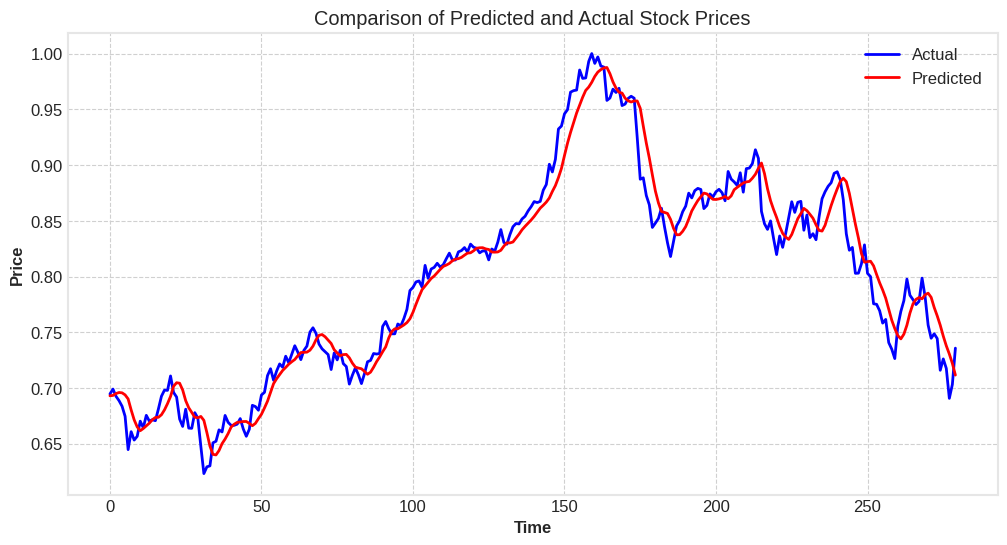

In [53]:
# Import the necessary library for plotting
import matplotlib.pyplot as plt

# Create a new figure with a specific size
plt.figure(figsize=(12, 6))

# Plot the actual values in blue
plt.plot(actual_values, label='Actual', color='blue')

# Plot the predicted values in red
plt.plot(predicted_values, label='Predicted', color='red')

# Add a legend to distinguish between actual and predicted values
plt.legend()

# Add a title to the plot
plt.title('Comparison of Predicted and Actual Stock Prices')

# Label the x and y axes for clarity
plt.xlabel('Time')
plt.ylabel('Price')

# Display the plot
plt.show()

8a. The provided data indicates that the prediction error (MSE) remains stable during testing, suggesting that the model's performance does not significantly worsen as you move further from the last training period. the training loss significantly decreases, indicating the model's ability to fit the training data. Testing implies there is good generalization

8b. The provided data and analysis focus on the prediction error (MSE) of a model and do not directly address the profitability of trading with bid-ask spreads and commissions taken into account.

8c. The obtained LSTM model results show stable prediction error, but assessing profitability compared to a buy-and-hold strategy requires a more comprehensive analysis, including actual returns, transaction costs, and market conditions.

9a. To modify the model to use multiple stock prices as inputs to predict a single stock, you would need to adjust the input size and potentially the data preprocessing. However, the provided code primarily focuses on the prediction of a single stock's closing price using its historical data. To include multiple stock prices as inputs, you should:

1. **Data Preprocessing**: Expand the dataset to include the historical data of the additional stocks you want to use as input features alongside the target stock.

2. **Input Size**: Adjust the `input_size` to match the number of input features, which will now include the historical prices of multiple stocks.

3. **Model Architecture**: Modify the LSTM model architecture to handle the increased input dimensions, considering the historical prices of multiple stocks.

4. **Training and Testing Data**: Ensure that the dataset is correctly structured with the data of all selected stocks for both training and testing.

5. **Evaluation**: Assess whether including multiple stock prices improves predictions by comparing the model's performance (e.g., MSE) against a baseline model that uses only the historical data of the single target stock.

This modification aims to capture potential relationships between the target stock and other stocks to improve prediction accuracy. However, the effectiveness of this approach may vary based on the specific stocks chosen and their relationships.

## References:
* most of the references are from ChatGPT and Bard which helped me find modules and helped in how to implement few functions
* LSTM model references
  * https://www.datacamp.com/tutorial/lstm-python-stock-market
  * https://www.kaggle.com/code/faressayah/stock-market-analysis-prediction-using-lstm
  * https://www.analyticsvidhya.com/blog/2021/12/stock-price-prediction-using-lstm/

* Finding out balance and comparison of Predicted and Actual Stock Prices, I discussed with Deepika(20D110013)